In [1]:
import pandas as pd
import numpy
import sklearn as sk
from pydub import AudioSegment
import matplotlib.pyplot as plt 
import os
import AudioFeatures

In [2]:
numpy.version.version

'1.14.3'

In [3]:
myfolder = '/Users/BharathiSrinivasan/Documents/DIMA_work/VASt2018/2018 Mini-Challenge 1/'
sound = AudioSegment.from_mp3(myfolder + "ALL BIRDS/Bent-Beak-Riffraff-28249.mp3")
sound.export(myfolder + "Birds_wav/"+"Bent-Beak-Riffraff-28249.wav", format="wav")

<_io.BufferedRandom name='/Users/BharathiSrinivasan/Documents/DIMA_work/VASt2018/2018 Mini-Challenge 1/Birds_wav/Bent-Beak-Riffraff-28249.wav'>

In [4]:
def readAudioFile(path):
    '''
    This function returns a numpy array that stores the audio samples of a specified WAV of AIFF file
    '''
    extension = os.path.splitext(path)[1]

    try:
        #if extension.lower() == '.wav':
            #[Fs, x] = wavfile.read(path)
        if extension.lower() == '.aif' or extension.lower() == '.aiff':
            s = aifc.open(path, 'r')
            nframes = s.getnframes()
            strsig = s.readframes(nframes)
            x = numpy.fromstring(strsig, numpy.short).byteswap()
            Fs = s.getframerate()
        elif extension.lower() == '.mp3' or extension.lower() == '.wav' or extension.lower() == '.au':            
            try:
                audiofile = AudioSegment.from_file(path)
            #except pydub.exceptions.CouldntDecodeError:
            except:
                print("Error: file not found or other I/O error. (DECODING FAILED)")
                return (-1,-1)                

            if audiofile.sample_width==2:                
                data = numpy.fromstring(audiofile._data, numpy.int16)
            elif audiofile.sample_width==4:
                data = numpy.fromstring(audiofile._data, numpy.int32)
            else:
                return (-1, -1)
            Fs = audiofile.frame_rate
            x = []
            for chn in range(audiofile.channels):
                x.append(data[chn::audiofile.channels])
            x = numpy.array(x).T
        else:
            print("Error in readAudioFile(): Unknown file type!")
            return (-1,-1)
    except IOError: 
        print("Error: file not found or other I/O error.")
        return (-1,-1)

    if x.ndim==2:
        if x.shape[1]==1:
            x = x.flatten()

    return (Fs, x)

In [5]:
[Fs, x] = readAudioFile(myfolder + "Birds_wav/"+"Bent-Beak-Riffraff-28249.wav");

/Users/BharathiSrinivasan/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [6]:
%run -i 'AudioFeatures.py'

In [7]:
F = AudioFeatures.stFeatureExtraction(x, Fs, 0.050*Fs, 0.025*Fs);

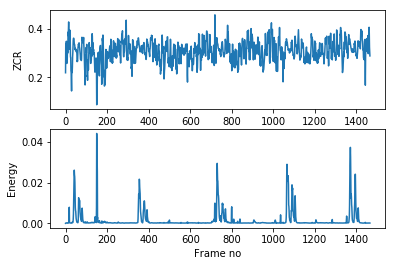

In [8]:
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel('ZCR'); 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel('Energy'); plt.show()

In [11]:
F.shape

(34, 1466)